exemplo de correção da inclinação da barra

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
import math
from bar_funcs import *
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 10

In [3]:
#caminhos galáxia + satélite
# path_01_10 = 'satelites/sat01-10/'
# path_01_20 = 'satelites/sat01-20/'
# path_01_30 = 'satelites/sat01-30/'
# path_05_10 = 'satelites/sat05-10/'
# path_05_20 = 'satelites/sat05-20/'
# path_05_30 = 'satelites/sat05-30/'
# path_1_10 = 'satelites/sat1-10/'
# path_1_20 = 'satelites/sat1-20/'
path_1_30 = 'satelites/sat1-30/'

#paths = [path_01_10, path_01_20, path_01_30, path_05_10, path_05_20, path_05_30, path_1_10, path_1_20, path_1_30]

In [4]:
n_snapshots = 10

In [5]:
thetas = np.empty(n_snapshots)

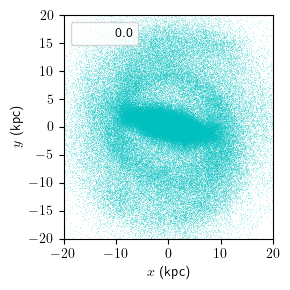

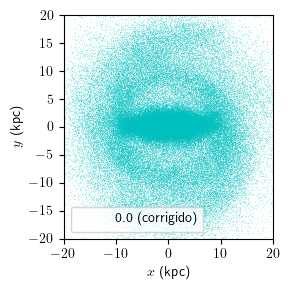

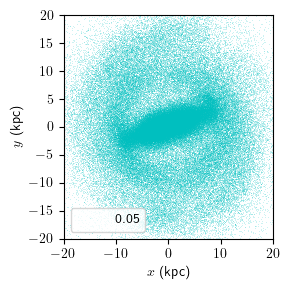

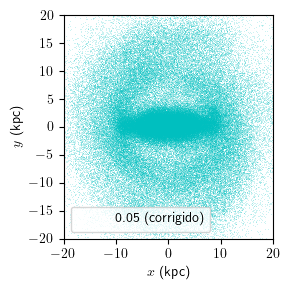

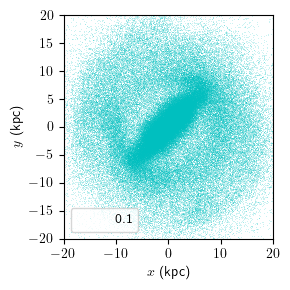

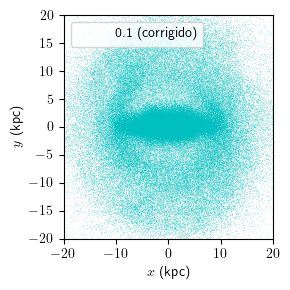

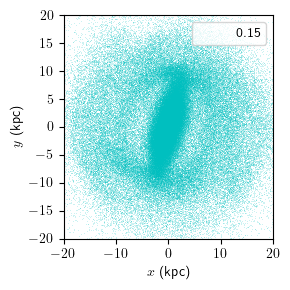

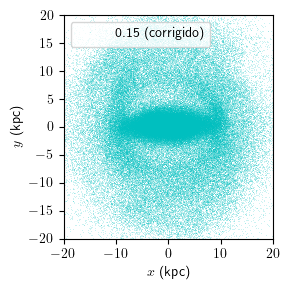

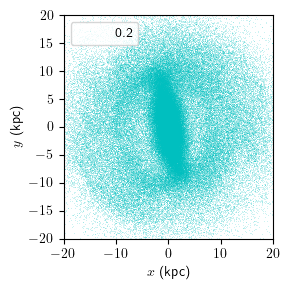

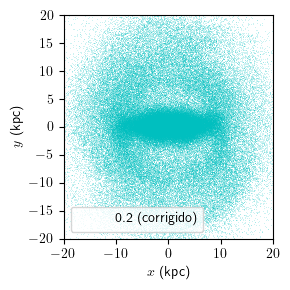

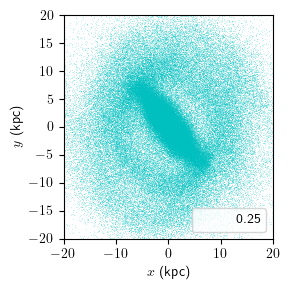

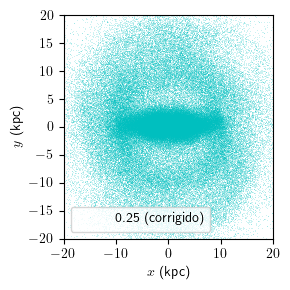

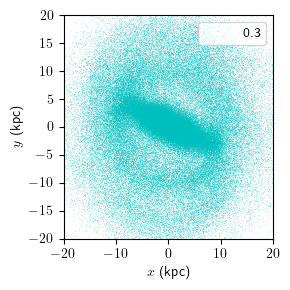

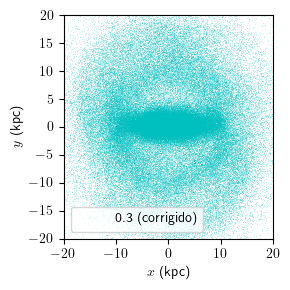

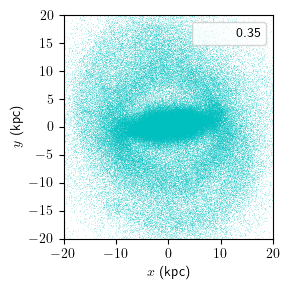

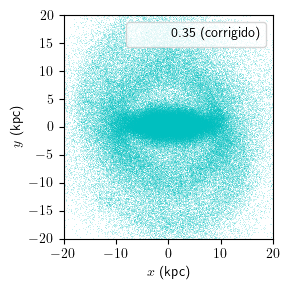

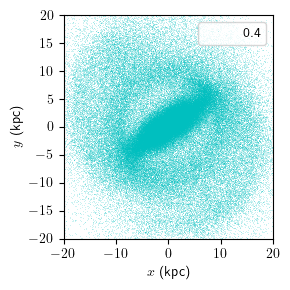

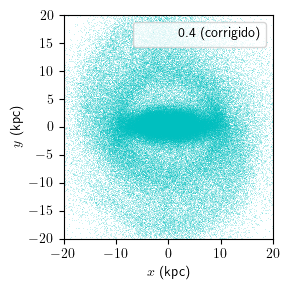

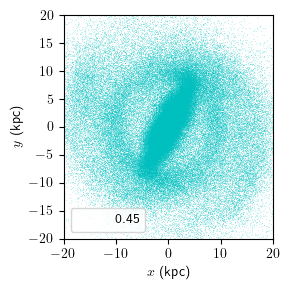

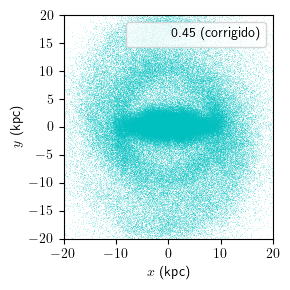

In [6]:
for j in range (0, n_snapshots): 
    index = str(j).zfill(3)
    snapshot = path_1_30 + f'snapshot_{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco e corrigir posição
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))

    time = round(f['Header'].attrs['Time'], 2)

    #corrigir centro de massa
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

    #calcular theta da barra
    thetas[j] = theta_bar(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=10.0)

    #teste
    plt.figure(figsize=[3,3])
    plt.plot(x_new_disk, y_new_disk, ',', alpha=0.2, color='c', label=time)
    plt.xlabel('$x$ (kpc)')
    plt.ylabel('$y$ (kpc)')
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.legend()
    plt.tight_layout()

    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x_new_disk, y=y_new_disk, theta=thetas[j])

    plt.figure(figsize=[3,3])
    plt.plot(x_new_disk2, y_new_disk2, ',', alpha=0.2, color='c', label=f'{time} (corrigido)')
    # x = np.linspace(-20, 20, 1)
    # linha = a * x_new_disk
    #plt.plot(x_new_disk, linha, 'r-')
    plt.xlabel('$x$ (kpc)')
    plt.ylabel('$y$ (kpc)')
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.legend()
    plt.tight_layout()